# According to LLD format

In [171]:
### Read data from csv
import pandas as pd
day = pd.read_csv('day.csv')

### cheack whether the data loaded properly or not using head and tail() function.
day.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [172]:
day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


# 4. Data Profiling

In [173]:
# number of rows and columns in the dataframe
day.shape

(731, 16)

In [174]:
### no.of missing values and there percentage 
day.isnull().sum().mean()

0.0

In [175]:
### no.of misinng values and there percentage per column 
day.isnull().sum()/day.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [176]:
# column names
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [177]:
# checking the categorical column and their list
print(day['season'].unique())
print(day['yr'].unique())
print(day['holiday'].unique())
print(day['workingday'].unique())
print( day['weathersit'].unique())
print(day['weekday'].unique())
print(day['season'].unique())
print(day['yr'].unique())
print(day['holiday'].unique())
print(day['workingday'].unique())

[1 2 3 4]
[0 1]
[0 1]
[0 1]
[2 1 3]
[6 0 1 2 3 4 5]
[1 2 3 4]
[0 1]
[0 1]
[0 1]


In [178]:
# number of duplicate rows in columns
day.pivot_table(index=['season', 'yr', 'holiday', 'workingday', 'weathersit', 'weekday'], aggfunc='size')

season  yr  holiday  workingday  weathersit  weekday
1       0   0        0           1           0          11
                                             6           9
                                 2           0           2
                                             6           5
                     1           1           1           7
                                                        ..
4       1   0        1           3           1           1
                                             2           1
            1        0           1           1           1
                                             4           1
                                 2           1           1
Length: 145, dtype: int64

In [179]:
# number of columns with zero standard deviation
day.std(axis=0)

instant        211.165812
season           1.110807
yr               0.500342
mnth             3.451913
holiday          0.167155
weekday          2.004787
workingday       0.465233
weathersit       0.544894
temp             0.183051
atemp            0.162961
hum              0.142429
windspeed        0.077498
casual         686.622488
registered    1560.256377
cnt           1937.211452
dtype: float64

In [180]:
# Size occupied in RAM columnwise
day.memory_usage(index = True) 

Index          128
instant       5848
dteday        5848
season        5848
yr            5848
mnth          5848
holiday       5848
weekday       5848
workingday    5848
weathersit    5848
temp          5848
atemp         5848
hum           5848
windspeed     5848
casual        5848
registered    5848
cnt           5848
dtype: int64

In [181]:
#Total size occupied by dataframe
day.memory_usage(index=True).sum()

93696

In [182]:
#changing column names
day = day.rename(columns={'dteday':'date','yr': 'year', 'mnth': 'month', 'temp':'temparature', 'hum':'humidity', 'cnt':'count'})

In [183]:
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [184]:
day.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temparature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [185]:
#droping the columns which have no insight in the data of instance and date columns
day= day.drop(columns=['instant', 'date'])

In [186]:
# It will explain the distributon of the data
day.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Missing values¶

In Data analysis
finding missing values,

distribution of numerical values,

categorical values and their cardinolity,

outliers detection,

then relationship between the independent and dependent variables(cnt)

In [187]:
#1. check the percentage of nan values in each feature
features_miss = [features for features in day.columns if day[features].isnull().sum()>1 ]
features_miss

[]

In [188]:
#2. print the feature name and the percentage of missing values

for feature in features_miss:
    print(feature, np.round(day[feature].isnull().mean(), 4), '% missing values')

 the dataset day.csv does not have any missing values like nan, na, null values, no missing values imputation required in this case.

# Numerical variables finding

In [189]:
#List of numerical variables
numeric_feature = [features for features in day.columns if day[features].dtypes != 'O']

print('Number of numerical variables:', len(numeric_feature))

#see the numrical variables
day[numeric_feature].head()

Number of numerical variables: 14


,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The dataset day.csv having 14 numerical features in the dataset

## Discrete

In [190]:
#1. continuous and discrete features

dis_feature = [feature for feature in numeric_feature if len(day[feature].unique())<25]
#and feature not in year_feature+['instant']]
print("Discrete variable count: {}".format(len(dis_feature)))

Discrete variable count: 7


In [191]:
dis_feature

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

In [192]:
day[dis_feature].head()

,season,year,month,holiday,weekday,workingday,weathersit
0,1,0,1,0,6,0,2
1,1,0,1,0,0,0,2
2,1,0,1,0,1,1,1
3,1,0,1,0,2,1,1
4,1,0,1,0,3,1,1


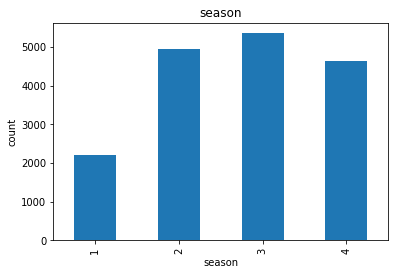

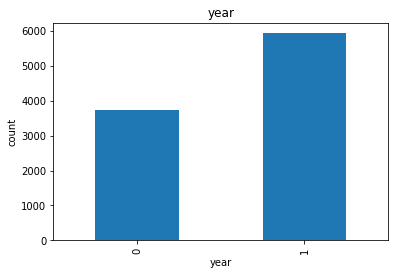

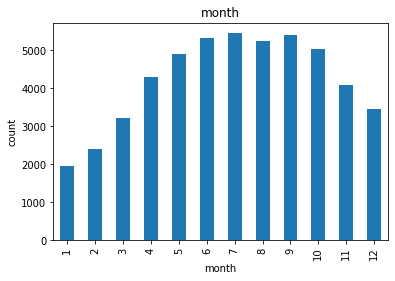

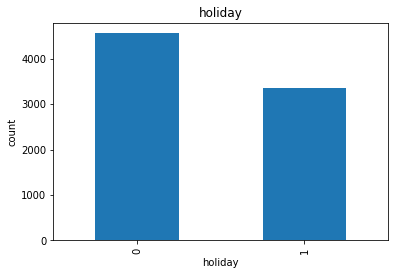

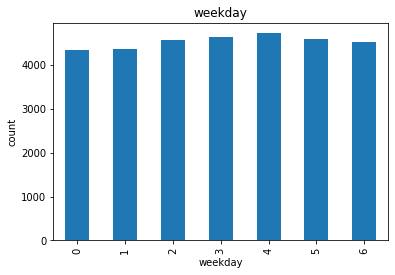

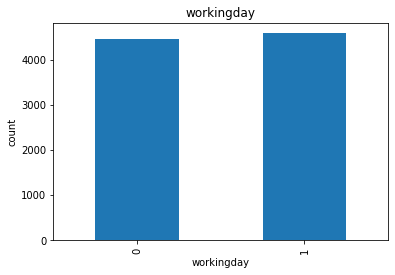

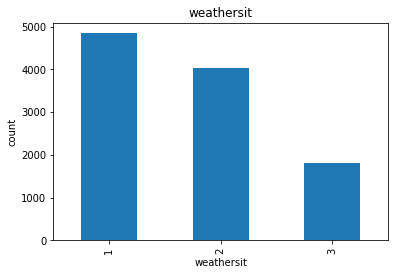

In [193]:
# let us see the relationship betweern the cnt
for feature in dis_feature:
    data=day.copy()
    data.groupby(feature)['count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

there is a relationship between the discrete variables verses dependet variable

## continuous variables


In [194]:
con_feature = [feature for feature in numeric_feature if  feature not in dis_feature]

print("Continuous variable count: {}".format(len(con_feature)))

Continuous variable count: 7


In [195]:
con_feature

['temparature',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

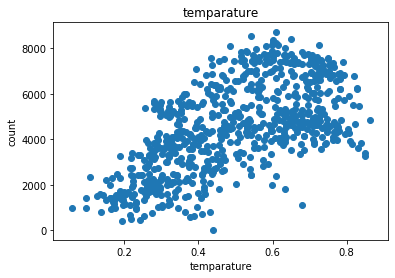

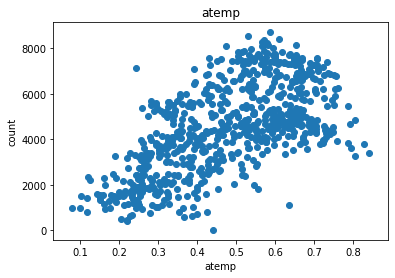

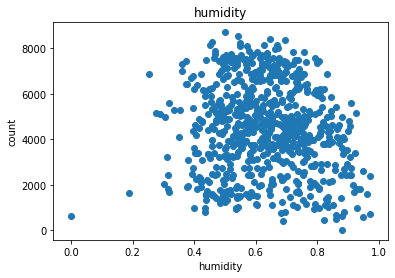

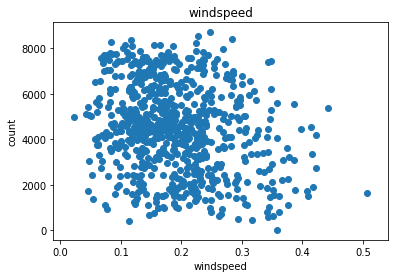

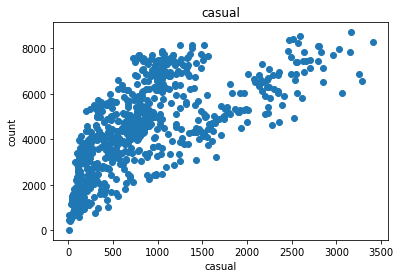

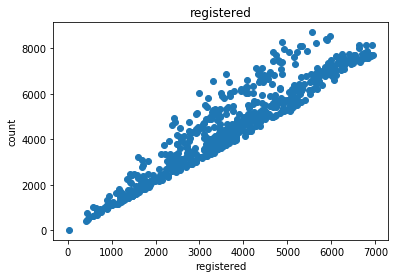

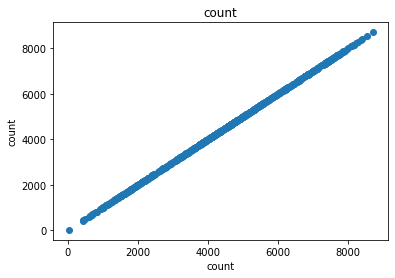

In [196]:
# let us see the relationship betweern the cnt
for feature in con_feature:
    data=day.copy()
   
    plt.scatter(data[feature], data['count'])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

## Data Transformation

After applying the log normal transformation maximum variables showed monotonic relationship

## Outliers detection in continuous variables

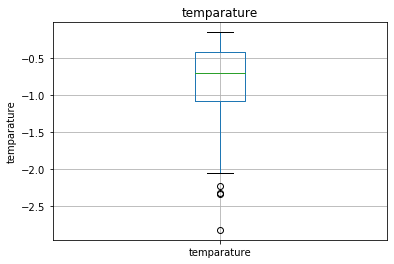

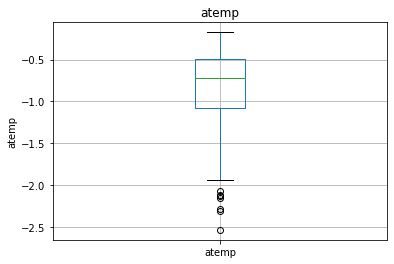

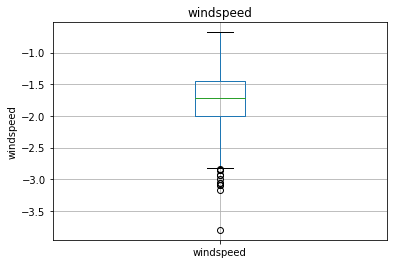

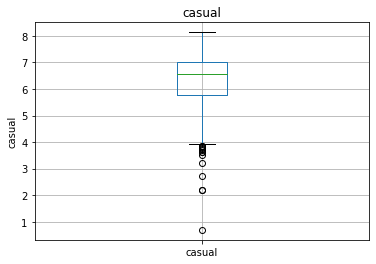

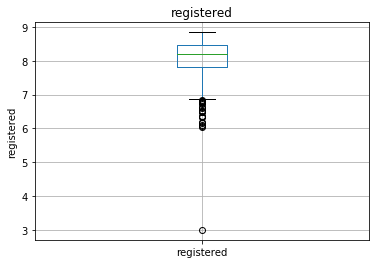

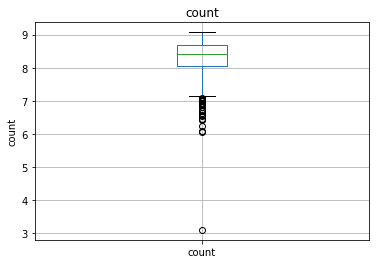

In [197]:
for feature in con_feature:
    data=day.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Categorical variables

In [198]:
cat_feature = [feature for feature in day.columns if data[feature].dtypes=="O"]
cat_feature

[]

# 6. Graph based EDA

# a. pair plot

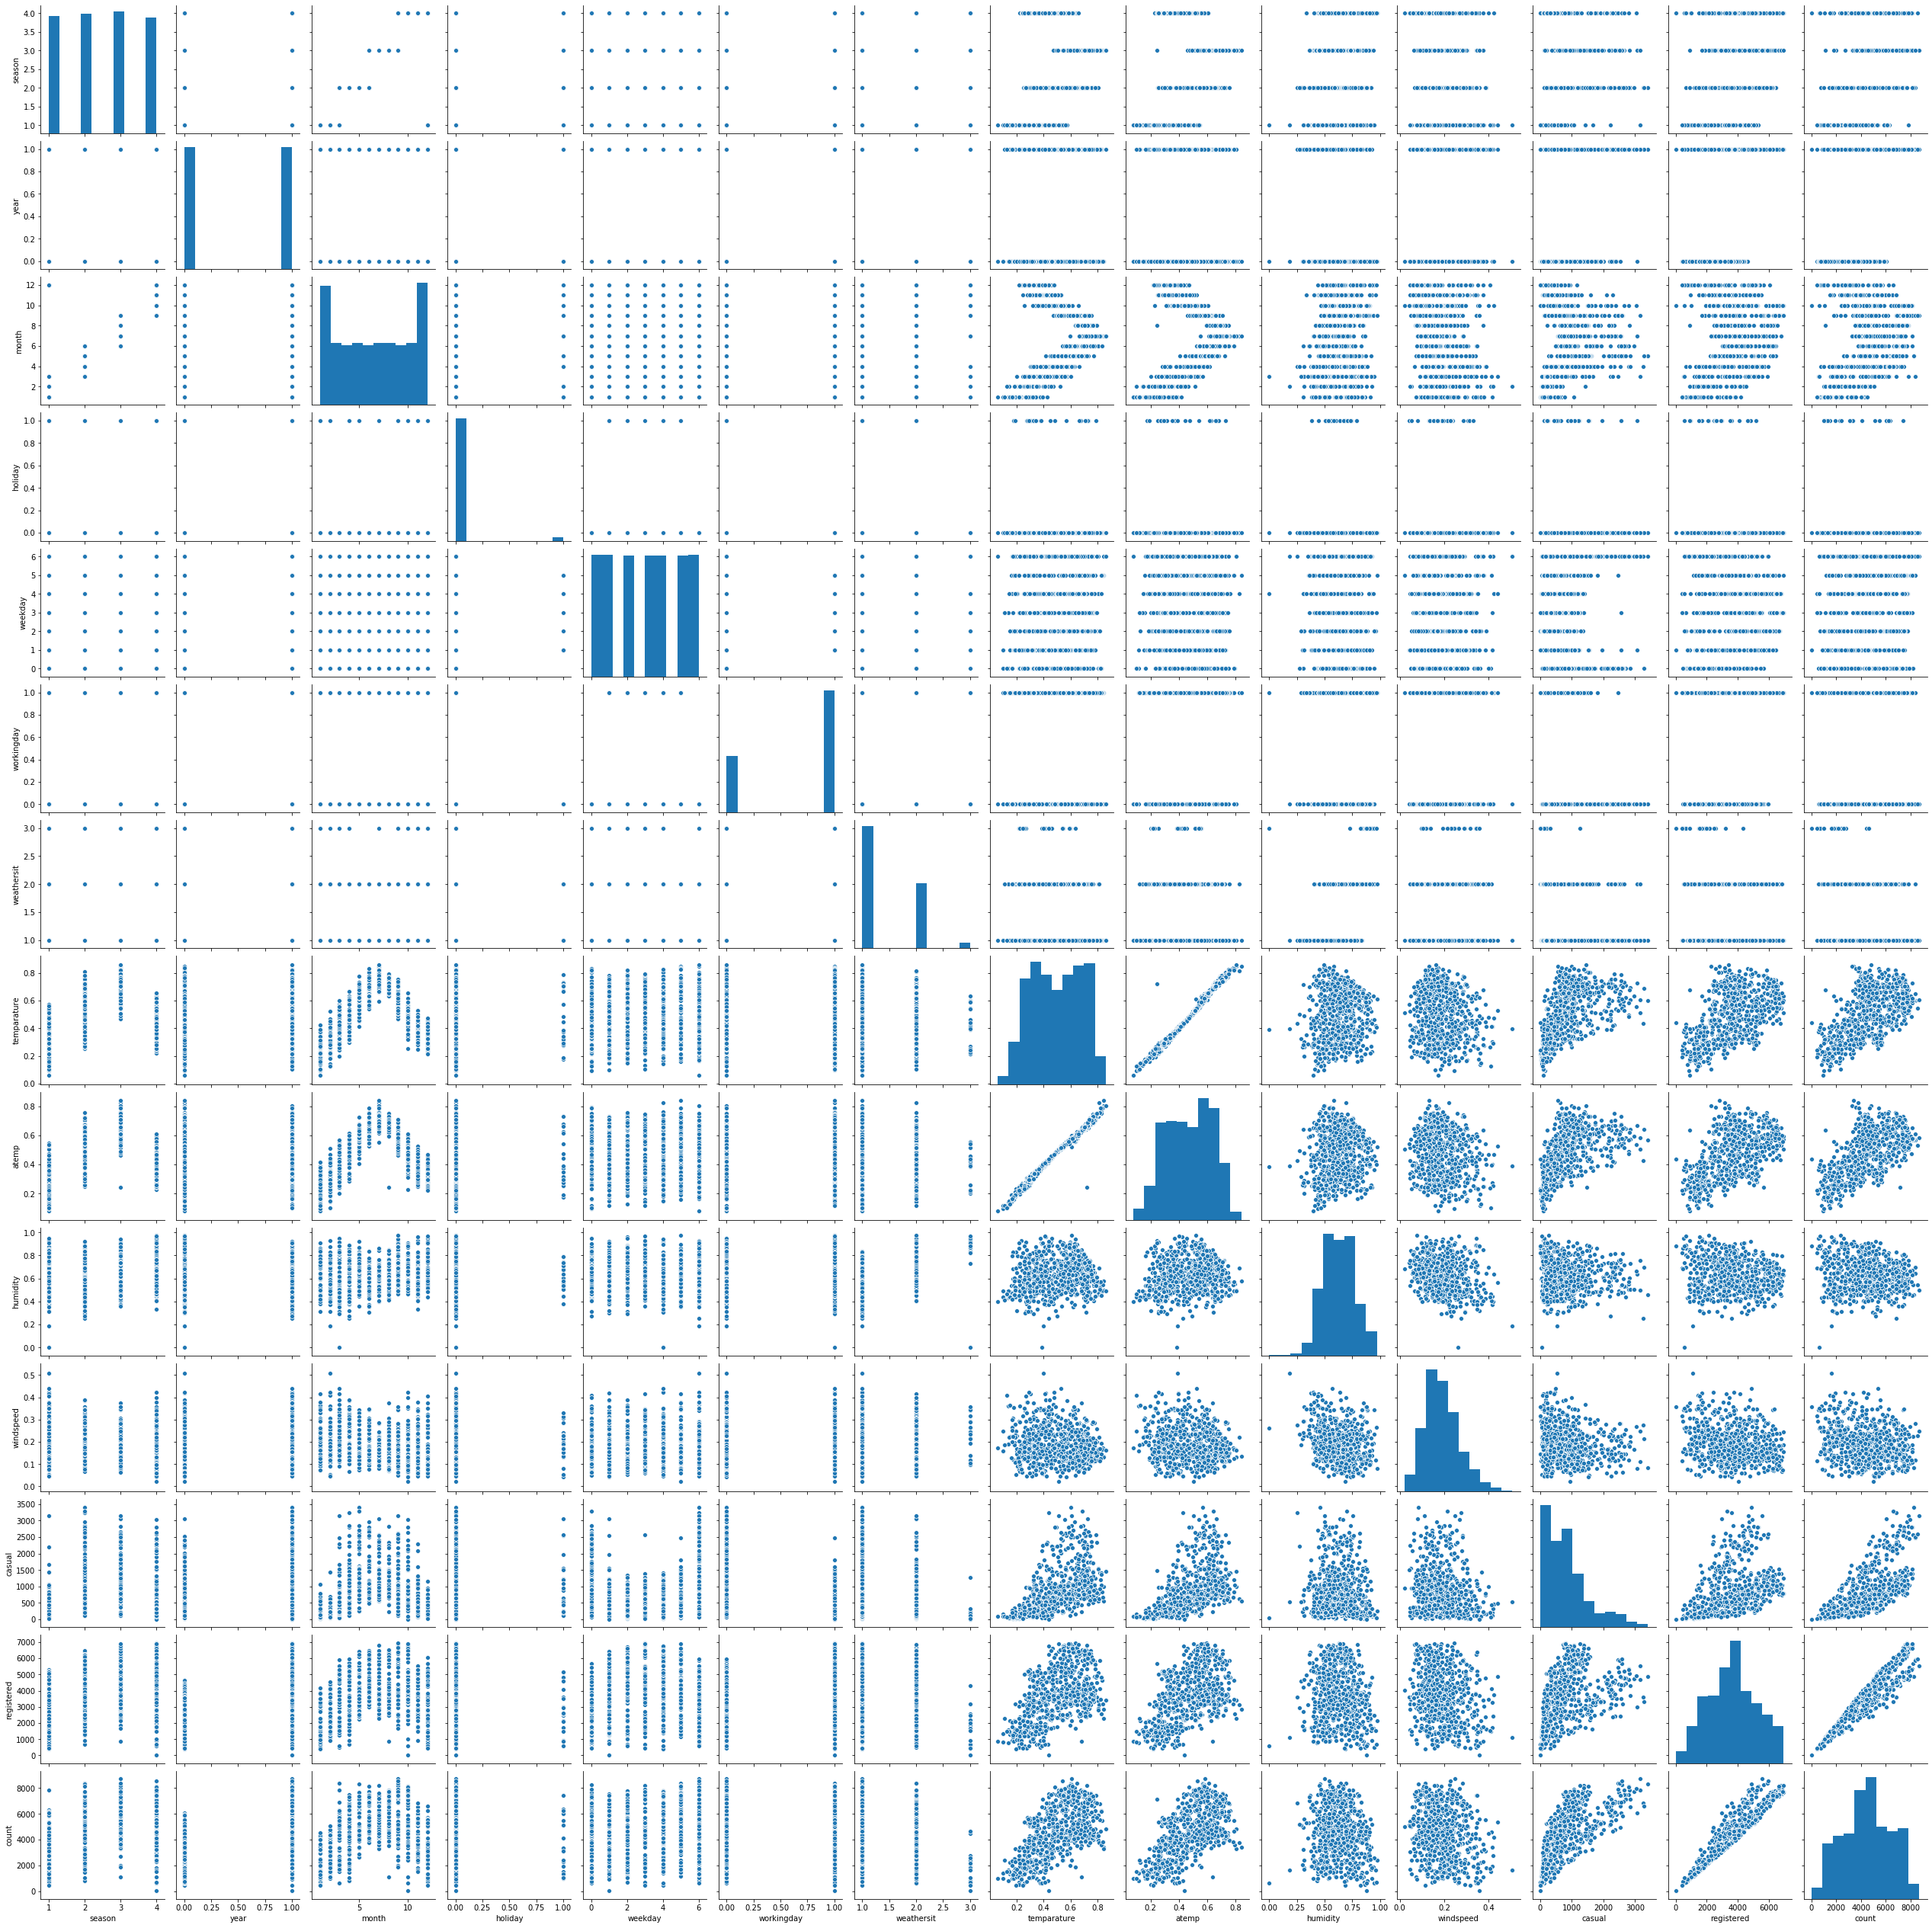

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.pairplot(day)

# b. correlation

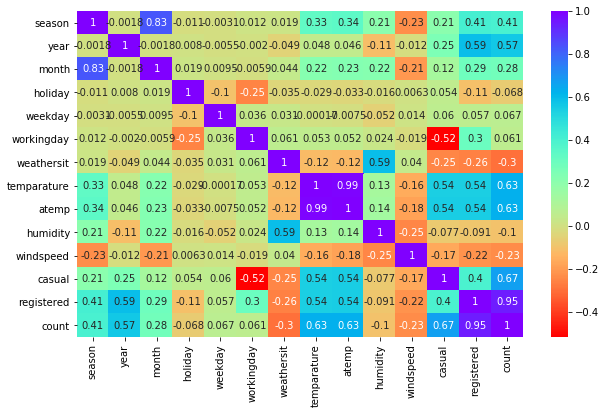

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=day.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,6))
g=sns.heatmap(day[top_corr_features].corr(),annot=True,cmap="rainbow_r")

## Feature engineering 

In [203]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [204]:
# x dataframe contain independent variables (casual and registed already given information to the count variable,
#so this two variable have no meaning for the model bbuilding)
# dropping output variable from independant variables
y = day['cnt']
# x dataframe contain independent variables
x = day.drop(columns=['cnt', 'dteday' , 'instant'])

In [205]:
x.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [206]:
# dropping output variable from independant variables
y = day['cnt']

In [207]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# c. Relation plot independent vs dependent variables

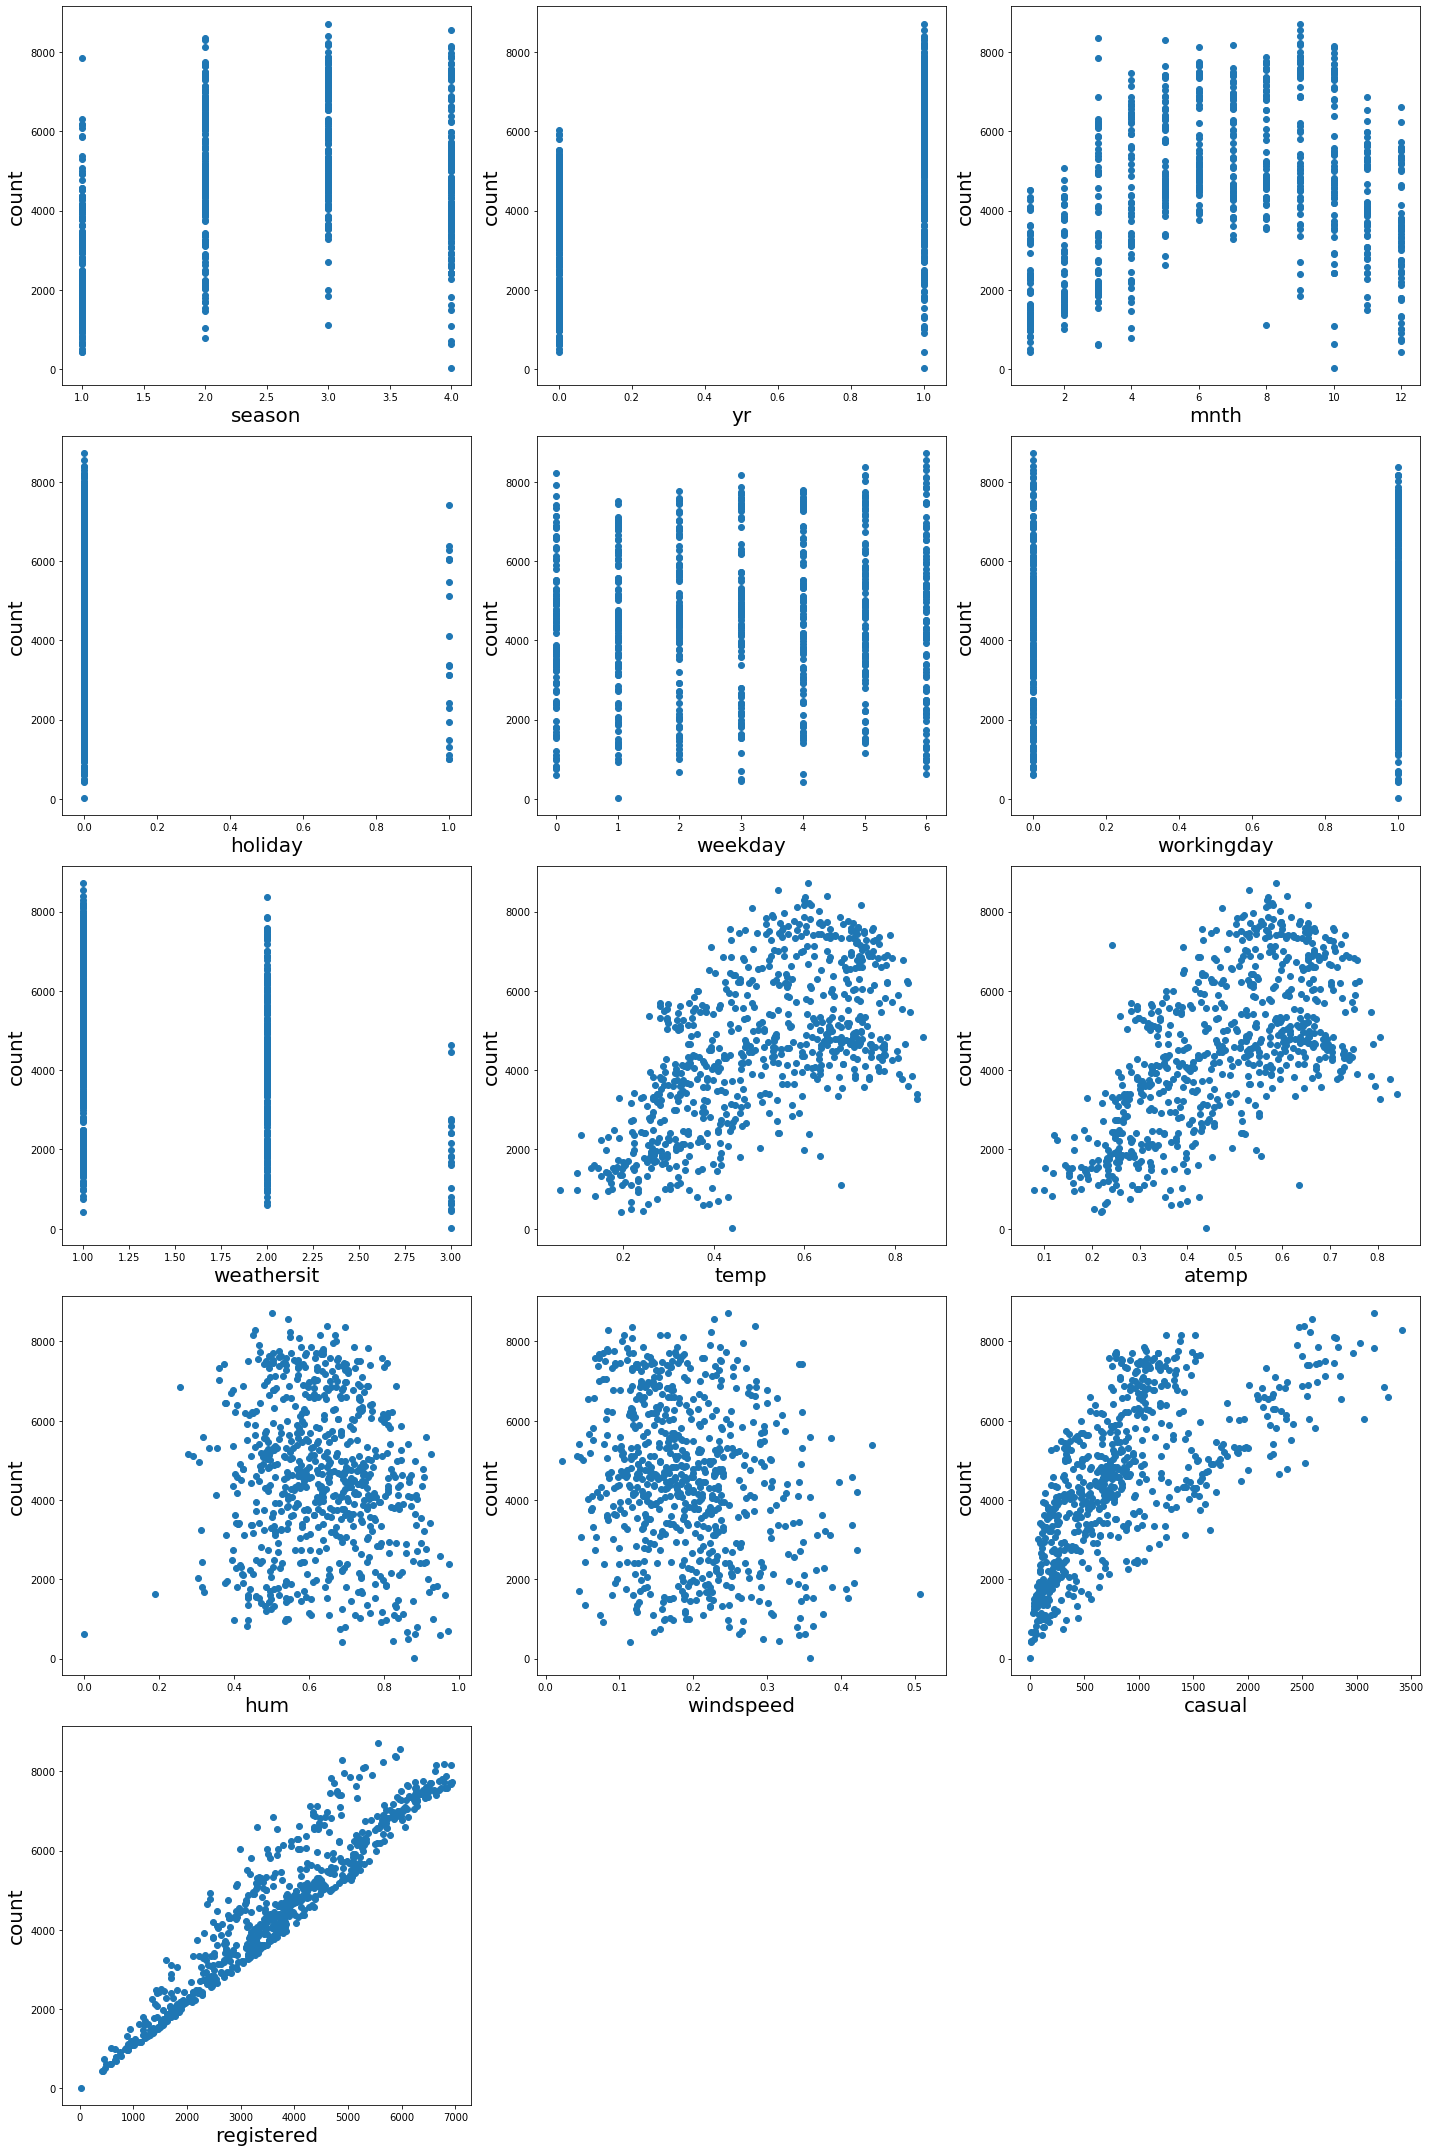

In [208]:
#the relationship between independent variables and dependent variable.

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# 5. Stats based EDA

# a. correlation

In [209]:
x.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089


In [210]:
x.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

# Feature scaling 

In [241]:
#Standardization of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# b. VIF

In [242]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] =x.columns

vif

,VIF,Features
0,4.104348,season
1,2.742865,yr
2,3.360293,mnth
3,1.098107,holiday
4,1.051268,weekday
5,3.111266,workingday
6,1.914898,weathersit
7,63.650194,temp
8,64.806018,atemp
9,1.948368,hum


In [245]:
#Droping the atemp variable even though temparature also given higehst vif but it seems to be important feature 
#when we are going to predict predict based an seasonal and environmental features.
x = x.drop(columns=['atemp','casual',  'registered'])

In [246]:
x.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900


# Randomized train and test split

In [235]:
#train and test split with standardized data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)
x_train,x_test,y_train,y_test

(array([[0.        , 1.        , 0.        , ..., 0.29998951, 0.08949531,
         0.54447011],
        [0.66666667, 1.        , 0.45454545, ..., 0.25384577, 0.74794601,
         0.62373664],
        [0.66666667, 0.        , 0.54545455, ..., 0.30128622, 0.4568662 ,
         0.41813457],
        ...,
        [0.33333333, 1.        , 0.36363636, ..., 0.20640326, 0.29019953,
         0.92593127],
        [1.        , 0.        , 1.        , ..., 0.24358955, 0.04489437,
         0.4833959 ],
        [1.        , 1.        , 0.81818182, ..., 0.19616559, 0.26085681,
         0.92650881]]),
 array([[0.66666667, 0.        , 0.63636364, ..., 0.37820894, 0.23444836,
         0.58099913],
        [0.66666667, 1.        , 0.54545455, ..., 0.21408255, 0.30809859,
         0.8068149 ],
        [0.33333333, 0.        , 0.36363636, ..., 0.66026438, 0.17634977,
         0.55269997],
        ...,
        [1.        , 0.        , 1.        , ..., 0.08076978, 0.06279343,
         0.50736356],
        [0.6

# PCA

In [248]:
from sklearn.decomposition import PCA
pca = PCA( n_components=5)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance.sum()

0.9999999999999999

# c. OLS: ordinary least squares 

In [249]:
#ols model with standardised data
import statsmodels.api as sma
from sklearn.metrics import r2_score
x_train = sma.add_constant(x_train)
x_test = sma.add_constant(x_test)

lm = sma.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     877.0
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          4.78e-257
Time:                        23:00:52   Log-Likelihood:                -4317.6
No. Observations:                 548   AIC:                             8647.
Df Residuals:                     542   BIC:                             8673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4521.6934     27.446    164.750      0.000    4467.780    4575.607
x1         -2988.6828     51.392    -58.155      0.000   -3089.635   -2887.731
x2          -615.0041     55.971    -10.988      0.000    -724.950    -505.058
x3          -316.9276     56.638     -5.596      0.000    -428.184    -205.672
x4         -1696.2877     82.223    -20.630      0.000   -1857.802   -1534.773
x5         -1725.7279     83.681    -20.623      0.000   -1890.107   -1561.349
==============================================================================
Omnibus:                       50.995   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.428
Skew:                          -0.520   Prob(JB):                     2.34e-25
Kurtosis:                       4.971   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
##
#Predicting the Train set results
y_pred_trn = lm.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = lm.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)

#print("Train adjusted R2 score:",adj_r2_trn)
#print("Test adjusted R2 score:",adj_r2_ts)

Train Mean Squared Error: 408275.08524017746
Test Mean Squared Error: 1155606.756500108
Train Root mean squared Error: 638.9640719478501
Test Root mean squared Error: 1074.9915146177239
Train R score: 0.8899921515974826
Test R score: 0.70006365702177


In [251]:
#7. Library based utils

In [252]:
# 8.Data Transformation and preproceessinng steps
# PCA

In [253]:
# no VIF criteria applied for bulding model

# Linear regression

In [254]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
regressor = LinearRegression()
regressor=regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[    0.         -2988.68279239  -615.00410209  -316.92764905
 -1696.28767034 -1725.72792222]
4521.693430656935


In [255]:
# create a function to create adjusted R-Squared
# adj_r2

# predicting to evaluation metrics

In [256]:

#Predicting the Train set results
y_pred_trn = regressor.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = regressor.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)

#print("Train adjusted R2 score:",adj_r2_trn)
#print("Test adjusted R2 score:",adj_r2_ts)

Train Mean Squared Error: 408275.0852401776
Test Mean Squared Error: 1155606.7565001084
Train Root mean squared Error: 638.9640719478502
Test Root mean squared Error: 1074.991514617724
Train R score: 0.8899921515974826
Test R score: 0.7000636570217699


# Elastic Net Regularization: 

In [257]:
#elastic net is used when we have confusion with the data having correct correlation or not in the dataset
elasticCV = ElasticNetCV(alphas = None, cv =10)

en_lr = elasticCV.fit(x_train, y_train)

en_lr

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [258]:
#Predicting the Train set results
y_pred_trn = en_lr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = en_lr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 2413557.9700252065
Test Mean Squared Error: 2668103.9356678613
Train Root mean squared Error: 1553.5629919720689
Test Root mean squared Error: 1633.43317453389
Train R score: 0.3496778792636137
Test R score: 0.30749683432647335


In [259]:
# saving the model to the local file system
import pickle 
filename = 'EN_Finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [261]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
lr=loaded_model.predict(scaler.transform([[1,0,1,0,6,0,2,0.34,0.8,0.16]]))
lr

ValueError: operands could not be broadcast together with shapes (1,10) (13,) (1,10) 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Decision tree

In [125]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(max_depth=10, random_state = 250)
dt = DTregressor.fit(x_train, y_train)

y_trn_predicted = dt.predict(x_train)
y_predicted = dt.predict(x_test)


# need to  check prediction

In [126]:
#Predicting the Train set results
y_pred_trn = dt.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = dt.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 95230.22206397483
Test Mean Squared Error: 4216976.218875444
Train Root mean squared Error: 308.59394366055665
Test Root mean squared Error: 2053.527749721304
Train R score: 0.9743406536159585
Test R score: -0.09451110284811315


# Random forest

In [127]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf = rf1.fit(x_train,y_train);
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [128]:
#Predicting the Train set results
y_pred_trn = rf.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = rf.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 114108.59471970813
Test Mean Squared Error: 3232454.215312569
Train Root mean squared Error: 337.7996369443107
Test Root mean squared Error: 1797.902726877227
Train R score: 0.9692539627247511
Test R score: 0.1610203983907521


In [129]:
 # Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [500, 700, 1000, 10000], 'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3]}

from sklearn.model_selection import GridSearchCV
rf_tuned = GridSearchCV(rf1, tuned_parameters, cv=5,  n_jobs=-1, verbose=1)
rf_tuned=rf_tuned.fit(x_train, y_train)
rf_tuned

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [130]:
#Predicting the Train set results
y_pred_trn = rf_tuned.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = rf_tuned.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 1102362.9297058221
Test Mean Squared Error: 2860696.6665169047
Train Root mean squared Error: 1049.9347264024664
Test Root mean squared Error: 1691.35941376069
Train R score: 0.7029733666351595
Test R score: 0.25750962280306355


# adaboost

In [131]:

from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor()
adab = adab.fit(x_train,y_train)

In [132]:
#Predicting the Train set results
y_pred_trn = adab.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = adab.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 850251.2813242966
Test Mean Squared Error: 3040290.4116928703
Train Root mean squared Error: 922.0907120908965
Test Root mean squared Error: 1743.6428566919517
Train R score: 0.7709036935110902
Test R score: 0.21089628236796187


# gradient boost

In [133]:

from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm = gbm.fit(x_train,y_train)


In [134]:
#Predicting the Train set results
y_pred_trn = gbm.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = gbm.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 318440.535113347
Test Mean Squared Error: 2916790.4005572326
Train Root mean squared Error: 564.3053562685251
Test Root mean squared Error: 1707.8613528495903
Train R score: 0.9141976589353773
Test R score: 0.24295056163678586


# svm

In [135]:

from sklearn.svm import SVR

svr = SVR(kernel='linear', C=100, gamma='auto')
svr = svr.fit(x_train, y_train)
svr

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [136]:
#Predicting the Train set results
y_pred_trn = svr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = svr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 951425.2971487782
Test Mean Squared Error: 3140588.1699080877
Train Root mean squared Error: 975.4103224534679
Test Root mean squared Error: 1772.1704686367189
Train R score: 0.7436428191705803
Test R score: 0.18486411992275753


# multi layer perceptron regressor

In [137]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(activation='identity')
mlpr = mlpr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [138]:
#Predicting the Train set results
y_pred_trn = mlpr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = mlpr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 21936852.818558875
Test Mean Squared Error: 21697202.709323637
Train Root mean squared Error: 4683.6794103096845
Test Root mean squared Error: 4658.025623515143
Train R score: -4.9107843376549
Test R score: -4.631482852524551


#xgboost

In [139]:
#conda install -c anaconda py-xgboost

# Ann

In [140]:
#! pip install keras

In [141]:
#!pip install tensorflow

In [142]:
#!pip install theano

# KNN

In [143]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(x_train, y_train)  #fit the model
    pred=knn.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1969.962806505847
RMSE value for k=  2 is: 1856.4985441045449
RMSE value for k=  3 is: 1849.4485085210986
RMSE value for k=  4 is: 1800.985124607468
RMSE value for k=  5 is: 1776.069719684542
RMSE value for k=  6 is: 1741.8135149568855
RMSE value for k=  7 is: 1724.681741772904
RMSE value for k=  8 is: 1711.2305372415824
RMSE value for k=  9 is: 1695.3279862936365
RMSE value for k=  10 is: 1689.1599187283161
RMSE value for k=  11 is: 1681.0722930779887
RMSE value for k=  12 is: 1688.6677777064008
RMSE value for k=  13 is: 1679.7771712938554
RMSE value for k=  14 is: 1672.8632565797707
RMSE value for k=  15 is: 1676.2518123580105
RMSE value for k=  16 is: 1670.5816791426746
RMSE value for k=  17 is: 1670.042821934667
RMSE value for k=  18 is: 1669.9553405117708
RMSE value for k=  19 is: 1661.9854748331977
RMSE value for k=  20 is: 1661.3789266808237


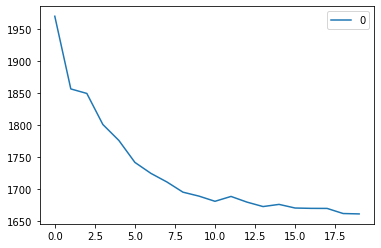

In [145]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [146]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 9}

In [147]:
knn = neighbors.KNeighborsRegressor(n_neighbors =9)
knn=knn.fit(x_train,y_train)

In [148]:
#Predicting the Train set results
y_pred_trn = knn.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = knn.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 711218.0620663238
Test Mean Squared Error: 2874136.9811104354
Train Root mean squared Error: 843.3374544429554
Test Root mean squared Error: 1695.3279862936363
Train R score: 0.8083655565048792
Test R score: 0.2540212053245522


In [149]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_train = polynomial_features.fit_transform(x_train)
x_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
plr=model.fit(x_train, y_train)
plr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
#Predicting the Train set results
y_pred_trn = plr.predict(x_train)
y_error_trn = y_train - y_pred_trn
mse_trn = (y_error_trn**2).mean()
rmse_trn = np.sqrt(mse_trn)
r2_score_trn = r2_score(y_train,y_pred_trn)
#adj_r2_trn = adj_r2(x_train,y_train)

# Predicting the Test set results
y_pred_ts = plr.predict(x_test)
y_error_ts = y_test - y_pred_ts
mse_ts = (y_error_ts**2).mean()
rmse_ts = np.sqrt(mse_ts)
r2_score_ts = r2_score(y_test,y_pred_ts)
#adj_r2_ts = adj_r2(x_train,y_train)

print("Train Mean Squared Error:",mse_trn)
print("Test Mean Squared Error:",mse_ts)

print("Train Root mean squared Error:",rmse_trn)
print("Test Root mean squared Error:",rmse_ts)

print("Train R score:",r2_score_trn)
print("Test R score:",r2_score_ts)


Train Mean Squared Error: 749573.8554183529
Test Mean Squared Error: 3184727.2858162886
Train Root mean squared Error: 865.7793341367955
Test Root mean squared Error: 1784.58042290514
Train R score: 0.7980307639765865
Test R score: 0.1734078655063377


In [151]:
#!pip install PrettyTable


In [152]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]
models = [
          regressor,
          en_lr,
          dt,
          rf_tuned,
          adab,
          gbm,
          svr,
          mlpr,
          knn,
          plr
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)

    mse = mean_squared_error(y_test, y_res)
    score = model.score(x_test, y_test)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s


KeyboardInterrupt: 

In [ ]:
# 9. ML Model.
#a.KNN
#b.Randomforest
#c.Xgboost


In [ ]:
# 10. Model tuning and optimization

#Linear regression
#Decision tree
#Random forest
#Xg boost
#svm
##knn

#Model evaluation criteria
#RMSE, MSE, R2, adj-R2

In [ ]:
# 11. Testing modules

In [ ]:
#12. Prediction pipeline

In [ ]:
#13.Deployment Strategy

In [ ]:
#14. Monitoring

In [ ]:
#15. Loggining